In [17]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# read the csv
df = pd.read_csv("Q3_KMeans.csv")
df

,Objects,X,Y,Z
0,OB-1,1,4,1
1,OB-2,1,2,2
2,OB-3,1,4,2
3,OB-4,2,1,2
4,OB-5,1,1,1
5,OB-6,2,4,2
6,OB-7,1,1,2
7,OB-8,2,1,1


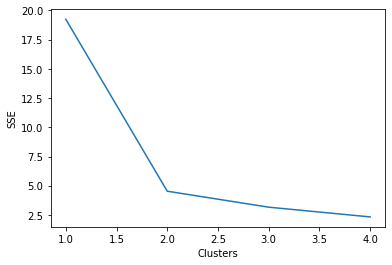

In [29]:
# train and test data split 
X = df.iloc[:,1:4].values

#elbow method
wcss = []
for i in range(1,5):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

#plot elbow curve
plt.plot(np.arange(1,5),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [31]:
# kmeans analysis
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y_predicted = k_means_optimum.fit_predict(X)
df['cluster'] = y_predicted
df.head() 

,Objects,X,Y,Z,cluster
0,OB-1,1,4,1,1
1,OB-2,1,2,2,0
2,OB-3,1,4,2,1
3,OB-4,2,1,2,0
4,OB-5,1,1,1,0


In [32]:
# clustering 0 and 1
data1 = df[df.cluster==0]
data2 = df[df.cluster==1]

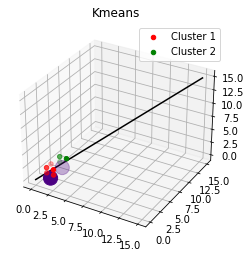

In [33]:
# plot the values into a 3D space
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1.X, data1.Y, data1.Z, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X,data2.Y,data2.Z,c ='green', label = 'Cluster 2')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()